# Drifting Upstream: Time Series Analysis

As Regression Records continues to explore models that might predict a song's popularity based on its music features, the executive team has asked us to conduct a time series analysis to determine how features have trended over the years.

We seek to answer:

- Have the prevalence of certain music features increased over the years?
- Have the prevalence of certain music features decreased over the years?
- How has the rate of increase/decrease changed in recent years compared to over a longer time span?

We hypothesize that: 

- Songs have become shorter, faster, louder, and more energetic over the years
- Songs have become less acoustic and less live over the years
- These changes were most drastic in recent years

To help answer our questions, we will use this __[dataset](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs)__ from Kaggle, consisting of of 30,000 Spotify songs. The variables of interest to our time series analysis include:

- **track_album_release_date** - Date when album released
- **danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- **speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **instrumentalness** - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **duration_ms** - Duration of song in milliseconds

Let's get started!

## Load Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

## Explore Data

In [22]:
df = pd.read_csv('spotify1.csv')
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

<div class="alert alert-block alert-info">We have 23 possible features, 32,833 observations, and no null values.</div>

In [24]:
df.playlist_genre.value_counts()

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

In [28]:
len(df.playlist_genre.unique())

6

In [25]:
df.playlist_subgenre.value_counts()

playlist_subgenre
progressive electro house    1809
southern hip hop             1675
indie poptimism              1672
latin hip hop                1656
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1458
electropop                   1408
urban contemporary           1405
hip hop                      1322
dance pop                    1298
classic rock                 1296
trap                         1291
tropical                     1288
latin pop                    1262
hip pop                      1256
big room                     1206
new jack swing               1133
post-teen pop                1129
permanent wave               1105
album rock                   1065
reggaeton                     949
Name: count, dtype: int64

In [30]:
len(df.playlist_subgenre.unique())

24

<div class="alert alert-block alert-info">For this analysis we will only be looking at numeric columns, but it is helpful to know in advance how the data are distributed categorically. We can see that the data are fairly evenly distributed across 6 genres and 24 subgenres. It is important to note that any conclusions we make about music features over time are derived from this particular sample. Given that we have a variety of genres and subgenres, we have some confidence in generalizability.</div>

In [31]:
# Remove columns irrelevant to our time series analysis for a simplified view of the data
df.drop(columns=['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 
                 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'key', 'mode'], inplace=True)

# Rename columns for further aesthetic simplicity
df.rename(columns={'track_album_release_date':'release_date', 'duration_ms':'duration'}, inplace=True)

df.head()

release_date  danceability  energy  loudness  speechiness  acousticness  \
0   2019-06-14         0.748   0.916    -2.634       0.0583        0.1020   
1   2019-12-13         0.726   0.815    -4.969       0.0373        0.0724   
2   2019-07-05         0.675   0.931    -3.432       0.0742        0.0794   
3   2019-07-19         0.718   0.930    -3.778       0.1020        0.0287   
4   2019-03-05         0.650   0.833    -4.672       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration  
0          0.000000    0.0653    0.518  122.036    194754  
1          0.004210    0.3570    0.693   99.972    162600  
2          0.000023    0.1100    0.613  124.008    176616  
3          0.000009    0.2040    0.277  121.956    169093  
4          0.000000    0.0833    0.725  123.976    189052

In [33]:
# Impute '01' for MM and DD when 'release_date' missing these values
# Convert 'release_date' to timedate format
df.release_date = df.release_date.apply(lambda x: x + '-01-01' if len(x) == 4 else x + '-01' if len(x) == 7 else x)
df.release_date = pd.to_datetime(df.release_date, format='%Y-%m-%d')

In [34]:
df.release_date.dt.year.value_counts()

release_date
2019    9081
2018    3312
2017    2430
2016    2127
2015    1779
        ... 
1960       4
1962       2
1957       2
1958       1
1961       1
Name: count, Length: 63, dtype: int64

In [35]:
df.describe()

release_date  danceability        energy  \
count                          32833  32833.000000  32833.000000   
mean   2011-08-07 17:30:40.185179648      0.654850      0.698619   
min              1957-01-01 00:00:00      0.000000      0.000175   
25%              2008-08-25 00:00:00      0.563000      0.581000   
50%              2016-08-26 00:00:00      0.672000      0.721000   
75%              2019-04-19 00:00:00      0.761000      0.840000   
max              2020-01-29 00:00:00      0.983000      1.000000   
std                              NaN      0.145085      0.180910   

           loudness   speechiness  acousticness  instrumentalness  \
count  32833.000000  32833.000000  32833.000000      32833.000000   
mean      -6.719499      0.107068      0.175334          0.084747   
min      -46.448000      0.000000      0.000000          0.000000   
25%       -8.171000      0.041000      0.015100          0.000000   
50%       -6.166000      0.062500      0.080400          0.000016   
75%       -4.645000      0.132000      0.255000          0.004830   
max        1.275000      0.918000      0.994000          0.994000   
std        2.988436      0.101314      0.219633          0.224230   

           liveness       valence         tempo       duration  
count  32833.000000  32833.000000  32833.000000   32833.000000  
mean       0.190176      0.510561    120.881132  225799.811622  
min        0.000000      0.000000      0.000000    4000.000000  
25%        0.092700      0.331000     99.960000  187819.000000  
50%        0.127000      0.512000    121.984000  216000.000000  
75%        0.248000      0.693000    133.918000  253585.000000  
max        0.996000      0.991000    239.440000  517810.000000  
std        0.154317      0.233146     26.903624   59834.006182

## Time Series Analysis

In [36]:
dfts = df.copy()
dfts.duration = round(dfts.duration / 60000, 2)
dfts['year'] = dfts.release_date.dt.year
len(dfts.release_date.dt.year.unique())

63

### Change from 1957 - 2020

In [37]:
slope_da63 = round(list(stats.linregress(x=dfts.year, y=dfts.danceability))[0],3)
slope_en63 = round(list(stats.linregress(x=dfts.year, y=dfts.energy))[0],3)
slope_lo63 = round(list(stats.linregress(x=dfts.year, y=dfts.loudness))[0],3)
slope_sp63 = round(list(stats.linregress(x=dfts.year, y=dfts.speechiness))[0],3)
slope_ac63 = round(list(stats.linregress(x=dfts.year, y=dfts.acousticness))[0],3)
slope_in63 = round(list(stats.linregress(x=dfts.year, y=dfts.instrumentalness))[0],3)
slope_li63 = round(list(stats.linregress(x=dfts.year, y=dfts.liveness))[0],3)
slope_va63 = round(list(stats.linregress(x=dfts.year, y=dfts.valence))[0],3)
slope_te63 = round(list(stats.linregress(x=dfts.year, y=dfts.tempo))[0],3)
slope_du63 = round(list(stats.linregress(x=dfts.year, y=dfts.duration))[0],3)

In [38]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']
slopes63 = [slope_da63, slope_en63, slope_lo63, slope_sp63, slope_ac63, slope_in63, slope_li63, slope_va63, slope_te63, slope_du63]
df_timechange = pd.DataFrame({'Feature': features, 'Slope_63': slopes63})
df_timechange.sort_values('Slope_63')

Feature  Slope_63
9          duration    -0.028
7           valence    -0.004
4      acousticness     0.000
6          liveness    -0.000
1            energy     0.001
3       speechiness     0.001
0      danceability     0.002
5  instrumentalness     0.002
8             tempo     0.051
2          loudness     0.078

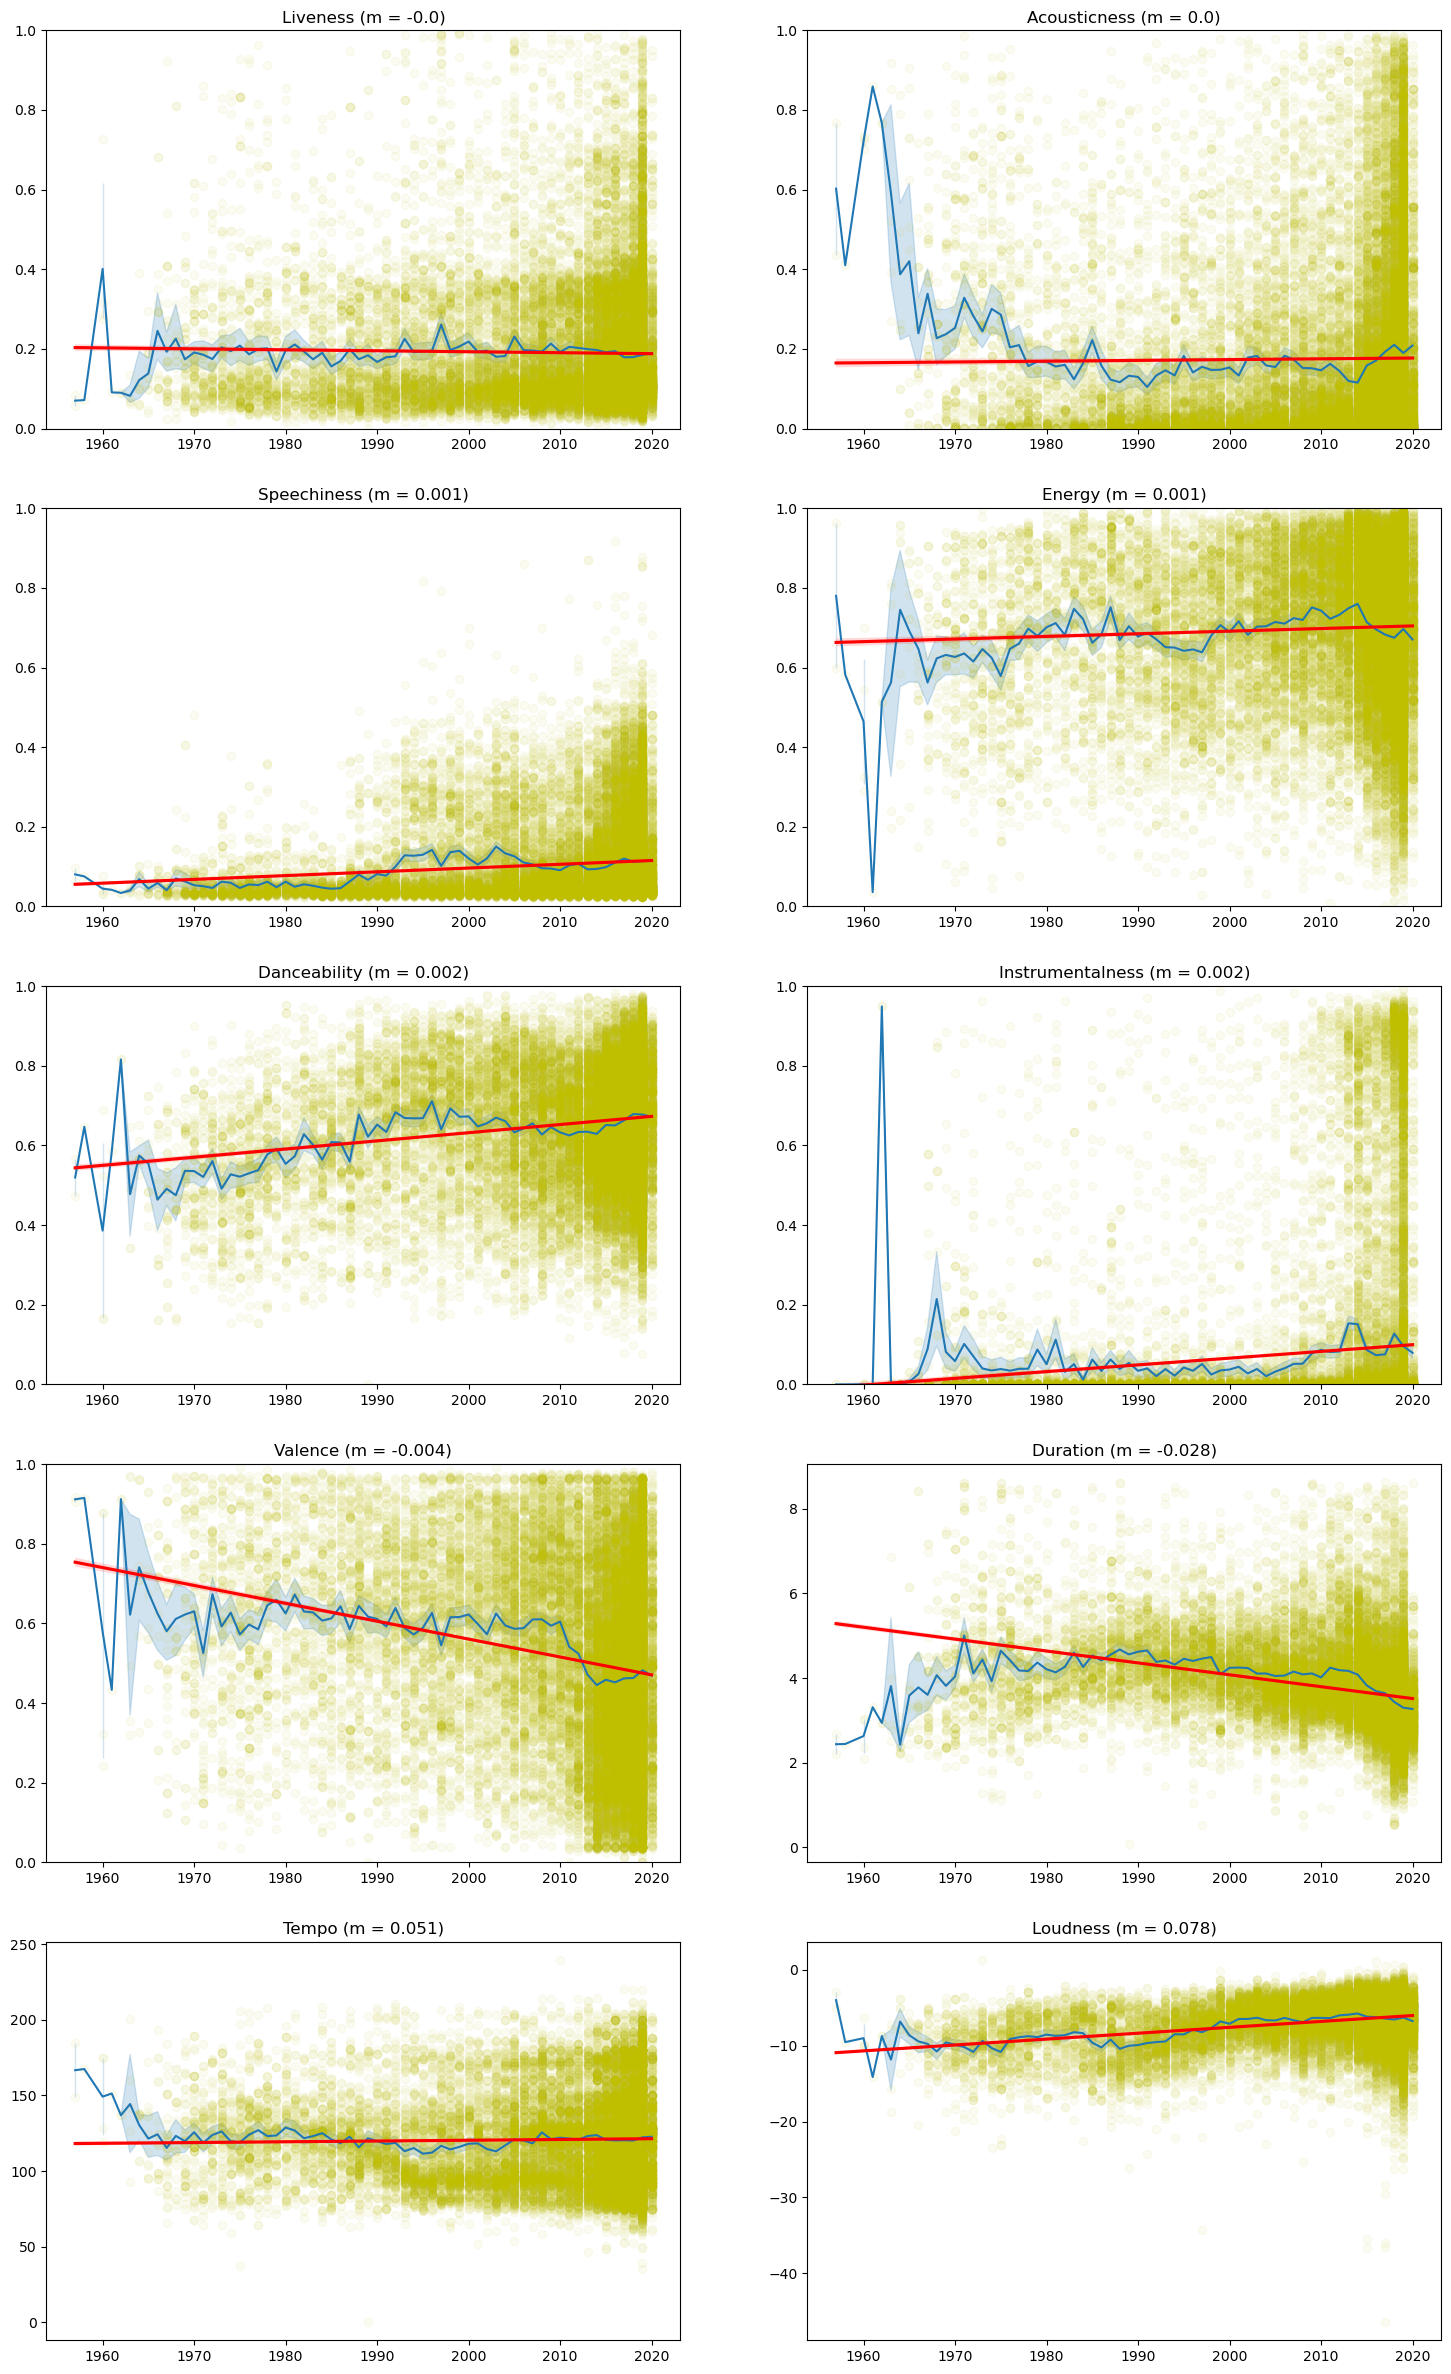

In [39]:
fig, axes = plt.subplots(5, 2, figsize = (18, 30))

sns.lineplot(dfts, x='year', y='liveness', ax=axes[0,0]);
sns.regplot(dfts, x='year', y='liveness', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, 
            ax=axes[0,0]).set(xlabel=None, ylabel=None, ylim=(0,1.0), title=f'Liveness (m = {slope_li63})');

sns.lineplot(dfts, x='year', y='acousticness', ax=axes[0,1]);
sns.regplot(dfts, x='year', y='acousticness', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, 
            ax=axes[0,1]).set(xlabel=None, ylabel=None, ylim=(0,1.0), title=f'Acousticness (m = {slope_ac63})');

sns.lineplot(dfts, x='year', y='speechiness', ax=axes[1,0]);
sns.regplot(dfts, x='year', y='speechiness', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, 
            ax=axes[1,0]).set(xlabel=None, ylabel=None, ylim=(0,1.0), title=f'Speechiness (m = {slope_sp63})');

sns.lineplot(dfts, x='year', y='energy', ax=axes[1,1]);
sns.regplot(dfts, x='year', y='energy', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, 
            ax=axes[1,1]).set(xlabel=None, ylabel=None, ylim=(0,1.0), title=f'Energy (m = {slope_en63})');

sns.lineplot(dfts, x='year', y='danceability', ax=axes[2,0]);
sns.regplot(dfts, x='year', y='danceability', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, 
            ax=axes[2,0]).set(xlabel=None, ylabel=None, ylim=(0,1.0), title=f'Danceability (m = {slope_da63})');

sns.lineplot(dfts, x='year', y='instrumentalness', ax=axes[2,1]);
sns.regplot(dfts, x='year', y='instrumentalness', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, 
            ax=axes[2,1]).set(xlabel=None, ylabel=None, ylim=(0,1.0), title=f'Instrumentalness (m = {slope_in63})');

sns.lineplot(dfts, x='year', y='valence', ax=axes[3,0]);
sns.regplot(dfts, x='year', y='valence', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, 
            ax=axes[3,0]).set(xlabel=None, ylabel=None, ylim=(0,1.0), title=f'Valence (m = {slope_va63})');

sns.lineplot(dfts, x='year', y='duration', ax=axes[3,1]);
sns.regplot(dfts, x='year', y='duration', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, 
            ax=axes[3,1]).set(xlabel=None, ylabel=None, title=f'Duration (m = {slope_du63})');

sns.lineplot(dfts, x='year', y='tempo', ax=axes[4,0]);
sns.regplot(dfts, x='year', y='tempo', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, 
            ax=axes[4,0]).set(xlabel=None, ylabel=None, title=f'Tempo (m = {slope_te63})');

sns.lineplot(dfts, x='year', y='loudness', ax=axes[4,1]);
sns.regplot(dfts, x='year', y='loudness', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, 
            ax=axes[4,1]).set(xlabel=None, ylabel=None, title=f'Loudness (m = {slope_lo63})');

<div class="alert alert-block alert-info">
Key takeaways (1957 - 2020):
<ul>&bull; Songs became louder and faster</ul>
<ul>&bull; Songs became shorter and less positive</ul> 
<ul>&bull; Increase in instrumental and danceable music (e.g. EDM)</ul>
<ul>&bull; Increase in energetic and speechy music (e.g. Hip Hop)</ul>
</div>

In [40]:
#Filter to only include years that represent at least 1% of observations in the dataframe
year_counts = dfts.year.value_counts()
sorted(list(year_counts[year_counts > 328].index))

[2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

### Change from 2003 - 2020

In [41]:
dftsf = dfts.copy()
dftsf = dftsf[dftsf.year > 2002]
dftsf.shape

(27255, 12)

In [42]:
len(dftsf.year.unique())

18

In [43]:
slope_da18 = round(list(stats.linregress(x=dftsf.year, y=dftsf.danceability))[0],3)
slope_en18 = round(list(stats.linregress(x=dftsf.year, y=dftsf.energy))[0],3)
slope_lo18 = round(list(stats.linregress(x=dftsf.year, y=dftsf.loudness))[0],3)
slope_sp18 = round(list(stats.linregress(x=dftsf.year, y=dftsf.speechiness))[0],3)
slope_ac18 = round(list(stats.linregress(x=dftsf.year, y=dftsf.acousticness))[0],3)
slope_in18 = round(list(stats.linregress(x=dftsf.year, y=dftsf.instrumentalness))[0],3)
slope_li18 = round(list(stats.linregress(x=dftsf.year, y=dftsf.liveness))[0],3)
slope_va18 = round(list(stats.linregress(x=dftsf.year, y=dftsf.valence))[0],3)
slope_te18 = round(list(stats.linregress(x=dftsf.year, y=dftsf.tempo))[0],3)
slope_du18 = round(list(stats.linregress(x=dftsf.year, y=dftsf.duration))[0],3)

In [44]:
slopes18 = [slope_da18, slope_en18, slope_lo18, slope_sp18, slope_ac18, slope_in18, slope_li18, slope_va18, slope_te18, slope_du18]
df_timechange.sort_index(inplace=True)
df_timechange['Slope_18'] = slopes18
df_timechange.sort_values('Slope_18')

Feature  Slope_63  Slope_18
9          duration    -0.028    -0.069
7           valence    -0.004    -0.009
1            energy     0.001    -0.003
6          liveness    -0.000    -0.001
3       speechiness     0.001     0.000
0      danceability     0.002     0.003
2          loudness     0.078     0.003
5  instrumentalness     0.002     0.003
4      acousticness     0.000     0.004
8             tempo     0.051     0.135

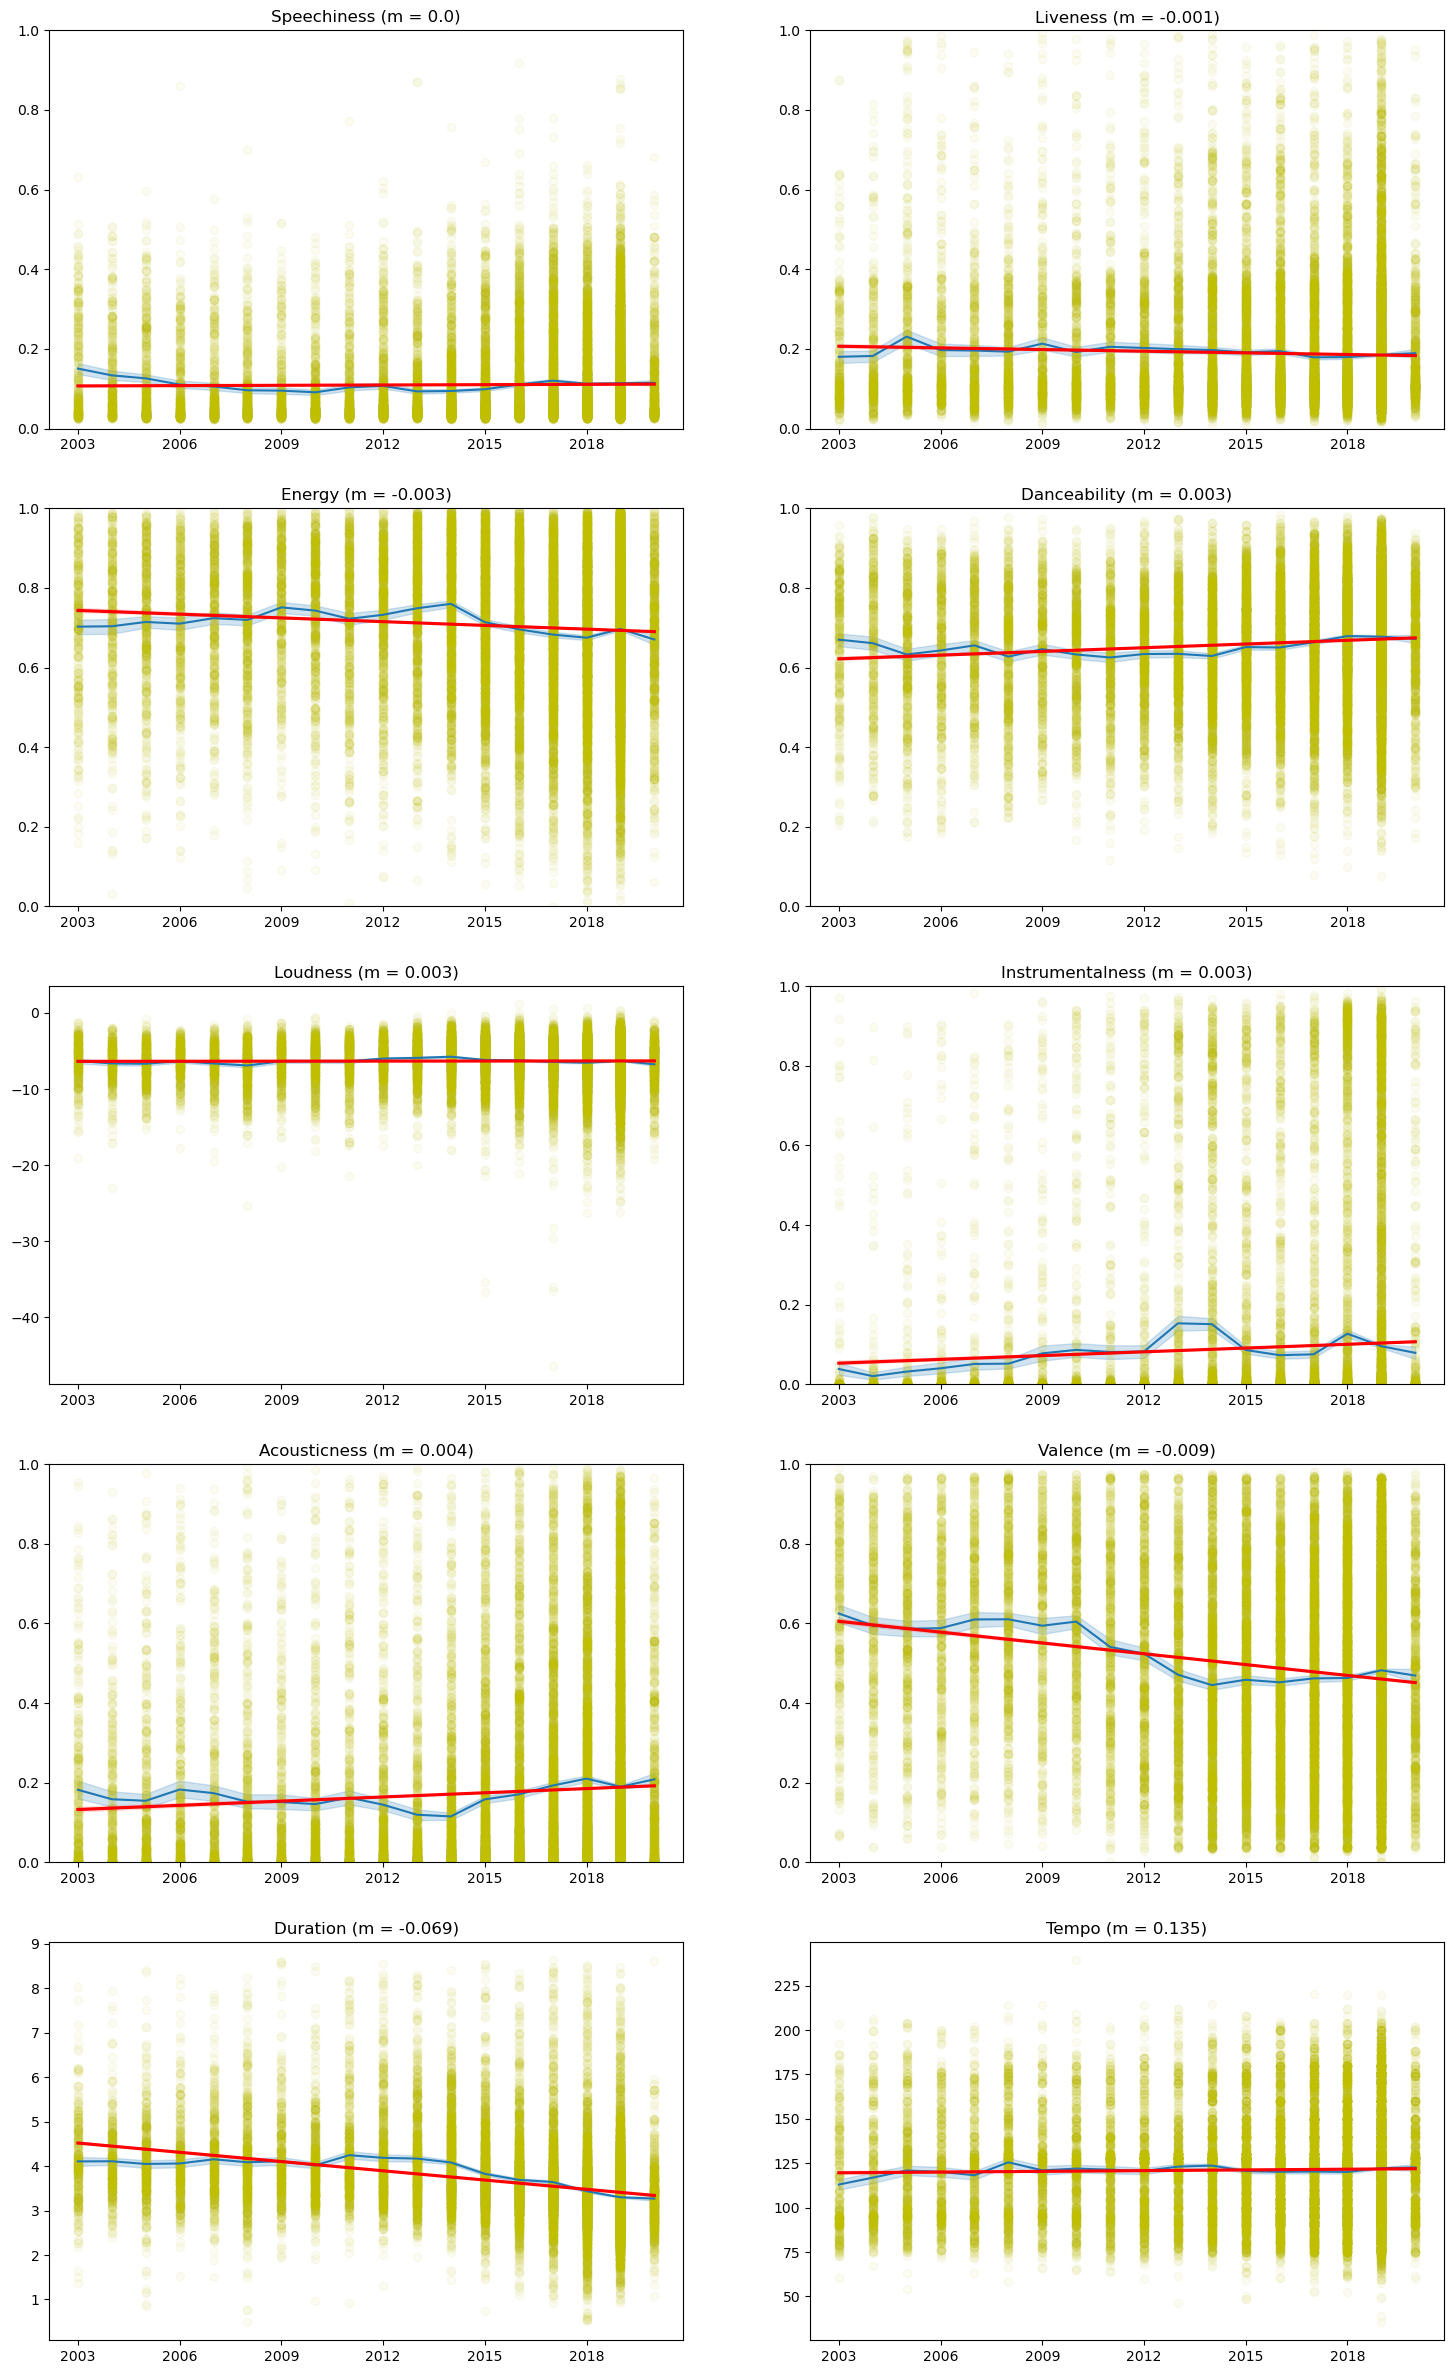

In [45]:
fig, axes = plt.subplots(5, 2, figsize = (18, 30))

sns.lineplot(dftsf, x='year', y='speechiness', ax=axes[0,0]);
sns.regplot(dftsf, x='year', y='speechiness', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[0,0]).set(
    xlabel=None, xticks=range(2003,2021,3), ylabel=None, ylim=(0,1.0), title=f'Speechiness (m = {slope_sp18})');

sns.lineplot(dftsf, x='year', y='liveness', ax=axes[0,1]);
sns.regplot(dftsf, x='year', y='liveness', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[0,1]).set(
    xlabel=None, xticks=range(2003,2021,3), ylabel=None, ylim=(0,1.0), title=f'Liveness (m = {slope_li18})');

sns.lineplot(dftsf, x='year', y='energy', ax=axes[1,0]);
sns.regplot(dftsf, x='year', y='energy', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[1,0]).set(
    xlabel=None, xticks=range(2003,2021,3), ylabel=None, ylim=(0,1.0), title=f'Energy (m = {slope_en18})');

sns.lineplot(dftsf, x='year', y='danceability', ax=axes[1,1]);
sns.regplot(dftsf, x='year', y='danceability', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[1,1]).set(
    xlabel=None, xticks=range(2003,2021,3), ylabel=None, ylim=(0,1.0), title=f'Danceability (m = {slope_da18})');

sns.lineplot(dftsf, x='year', y='loudness', ax=axes[2,0]);
sns.regplot(dftsf, x='year', y='loudness', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[2,0]).set(
    xlabel=None, xticks=range(2003,2021,3), ylabel=None, title=f'Loudness (m = {slope_lo18})');

sns.lineplot(dftsf, x='year', y='instrumentalness', ax=axes[2,1]);
sns.regplot(dftsf, x='year', y='instrumentalness', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[2,1]).set(
    xlabel=None, xticks=range(2003,2021,3), ylabel=None, ylim=(0,1.0), title=f'Instrumentalness (m = {slope_in18})');

sns.lineplot(dftsf, x='year', y='acousticness', ax=axes[3,0]);
sns.regplot(dftsf, x='year', y='acousticness', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[3,0]).set(
    xlabel=None, xticks=range(2003,2021,3), ylabel=None, ylim=(0,1.0), title=f'Acousticness (m = {slope_ac18})');

sns.lineplot(dftsf, x='year', y='valence', ax=axes[3,1]);
sns.regplot(dftsf, x='year', y='valence', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[3,1]).set(
    xlabel=None, xticks=range(2003,2021,3), ylabel=None, ylim=(0,1.0), title=f'Valence (m = {slope_va18})');

sns.lineplot(dftsf, x='year', y='duration', ax=axes[4,0]);
sns.regplot(dftsf, x='year', y='duration', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[4,0]).set(
    xlabel=None, xticks=range(2003,2021,3), ylabel=None, title=f'Duration (m = {slope_du18})');

sns.lineplot(dftsf, x='year', y='tempo', ax=axes[4,1]);
sns.regplot(dftsf, x='year', y='tempo', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[4,1]).set(
    xlabel=None, xticks=range(2003,2021,3), ylabel=None, title=f'Tempo (m = {slope_te18})');

<div class="alert alert-block alert-info">
Key takeaways (2003 - 2020):
<ul>&bull; Tempo increase more drastic</ul>
<ul>&bull; Duration and valence decrease more drastic</ul>
<ul>&bull; Songs became more acoustic; loudness increase less drastic</ul>
<ul>&bull; Energy decreased</ul>
</div>

### Change from 2021 - 2023

As our prior dataset only included observations up to 2020, to look at more recent years, we will utilize this __[dataset](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)__. Note that we have already cleaned this dataset in prior Drifting Upstream data wrangling.

In [50]:
df2 = pd.read_csv('spotify_2023_cleaned.csv', index_col=0)
df2.head()

track_name    artist(s)_name  artist_count  year  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2  2023   
1                                 LALA       Myke Towers             1  2023   
2                              vampire    Olivia Rodrigo             1  2023   
3                         Cruel Summer      Taylor Swift             1  2019   
4                       WHERE SHE GOES         Bad Bunny             1  2023   

   month  day  in_spotify_playlists  in_spotify_charts    streams  \
0      7   14                   553                147  141381703   
1      3   23                  1474                 48  133716286   
2      6   30                  1397                113  140003974   
3      8   23                  7858                100  800840817   
4      5   18                  3133                 50  303236322   

   in_apple_playlists  ...  key_C  key_C#  key_D  key_D#  key_E  key_F  \
0                  43  ...      0       0      0       0      0      0   
1                  48  ...      0       0      0       0      0      0   
2                  94  ...      0       0      0       0      0      1   
3                 116  ...      0       0      0       0      0      0   
4                  84  ...      0       0      0       0      0      0   

   key_F#  key_G  key_G#  release_date  
0       0      0       0    2023-07-14  
1       1      0       0    2023-03-23  
2       0      0       0    2023-06-30  
3       0      0       0    2019-08-23  
4       0      0       0    2023-05-18  

[5 rows x 36 columns]

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945 entries, 0 to 944
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            945 non-null    object 
 1   artist(s)_name        945 non-null    object 
 2   artist_count          945 non-null    int64  
 3   year                  945 non-null    int64  
 4   month                 945 non-null    int64  
 5   day                   945 non-null    int64  
 6   in_spotify_playlists  945 non-null    int64  
 7   in_spotify_charts     945 non-null    int64  
 8   streams               945 non-null    int64  
 9   in_apple_playlists    945 non-null    int64  
 10  in_apple_charts       945 non-null    int64  
 11  in_deezer_playlists   945 non-null    int64  
 12  in_deezer_charts      945 non-null    int64  
 13  in_shazam_charts      895 non-null    float64
 14  bpm                   945 non-null    int64  
 15  mode                  945 no

In [52]:
df2.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'year', 'month', 'day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'mode', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%', 'key_A', 'key_A#', 'key_B', 'key_C',
       'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G',
       'key_G#', 'release_date'],
      dtype='object')

In [53]:
df2.drop(columns=['track_name', 'artist(s)_name', 'artist_count', 'month', 'day', 'in_spotify_playlists', 
                  'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
                  'in_deezer_charts', 'in_shazam_charts', 'mode', 'key_A', 'key_A#', 'key_B', 'key_C',
                  'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#'], inplace=True)
df2.rename(columns={'bpm':'tempo', 'danceability_%': 'danceability', 'valence_%': 'valence', 'energy_%': 'energy', 
                    'acousticness_%': 'acousticness', 'instrumentalness_%': 'instrumentalness', 
                    'liveness_%': 'liveness', 'speechiness_%': 'speechiness'}, inplace=True)

In [54]:
df2[['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']] = \
df2[['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']] / 100
df2.head()

year  tempo  danceability  valence  energy  acousticness  instrumentalness  \
0  2023    125          0.80     0.89    0.83          0.31              0.00   
1  2023     92          0.71     0.61    0.74          0.07              0.00   
2  2023    138          0.51     0.32    0.53          0.17              0.00   
3  2019    170          0.55     0.58    0.72          0.11              0.00   
4  2023    144          0.65     0.23    0.80          0.14              0.63   

   liveness  speechiness release_date  
0      0.08         0.04   2023-07-14  
1      0.10         0.04   2023-03-23  
2      0.31         0.06   2023-06-30  
3      0.11         0.15   2019-08-23  
4      0.11         0.06   2023-05-18

In [55]:
df2.year.value_counts()

year
2022    397
2023    176
2021    118
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
2000      4
1984      4
2004      4
1963      3
1958      3
1959      2
1991      2
1986      2
1985      2
1957      2
2003      2
1995      2
2008      2
1975      2
1982      2
1979      1
2005      1
1996      1
1998      1
1942      1
1950      1
2007      1
1946      1
1952      1
1971      1
1970      1
1994      1
1973      1
1968      1
1992      1
1983      1
1987      1
Name: count, dtype: int64

In [56]:
df2 = df2[df2.year > 2020]

In [57]:
dftsff = dftsf[dftsf.year > 2017]

In [58]:
df2.shape

(691, 10)

In [59]:
dftsff.shape

(13178, 12)

In [60]:
slope_da3 = round(list(stats.linregress(x=df2.year, y=df2.danceability))[0],3)
slope_en3 = round(list(stats.linregress(x=df2.year, y=df2.energy))[0],3)
slope_lo3 = round(list(stats.linregress(x=dftsff.year, y=dftsff.loudness))[0],3)
slope_sp3 = round(list(stats.linregress(x=df2.year, y=df2.speechiness))[0],3)
slope_ac3 = round(list(stats.linregress(x=df2.year, y=df2.acousticness))[0],3)
slope_in3 = round(list(stats.linregress(x=df2.year, y=df2.instrumentalness))[0],3)
slope_li3 = round(list(stats.linregress(x=df2.year, y=df2.liveness))[0],3)
slope_va3 = round(list(stats.linregress(x=df2.year, y=df2.valence))[0],3)
slope_te3 = round(list(stats.linregress(x=df2.year, y=df2.tempo))[0],3)
slope_du3 = round(list(stats.linregress(x=dftsff.year, y=dftsff.duration))[0],3)

In [61]:
slopes3 = [slope_da3, slope_en3, slope_lo3, slope_sp3, slope_ac3, slope_in3, slope_li3, slope_va3, slope_te3, slope_du3]
df_timechange.sort_index(inplace=True)
df_timechange['Slope_3'] = slopes3
df_timechange.sort_values('Slope_3')

Feature  Slope_63  Slope_18  Slope_3
8             tempo     0.051     0.135   -0.491
9          duration    -0.028    -0.069   -0.110
3       speechiness     0.001     0.000   -0.013
4      acousticness     0.000     0.004   -0.003
5  instrumentalness     0.002     0.003    0.002
0      danceability     0.002     0.003    0.010
6          liveness    -0.000    -0.001    0.014
7           valence    -0.004    -0.009    0.016
1            energy     0.001    -0.003    0.025
2          loudness     0.078     0.003    0.070

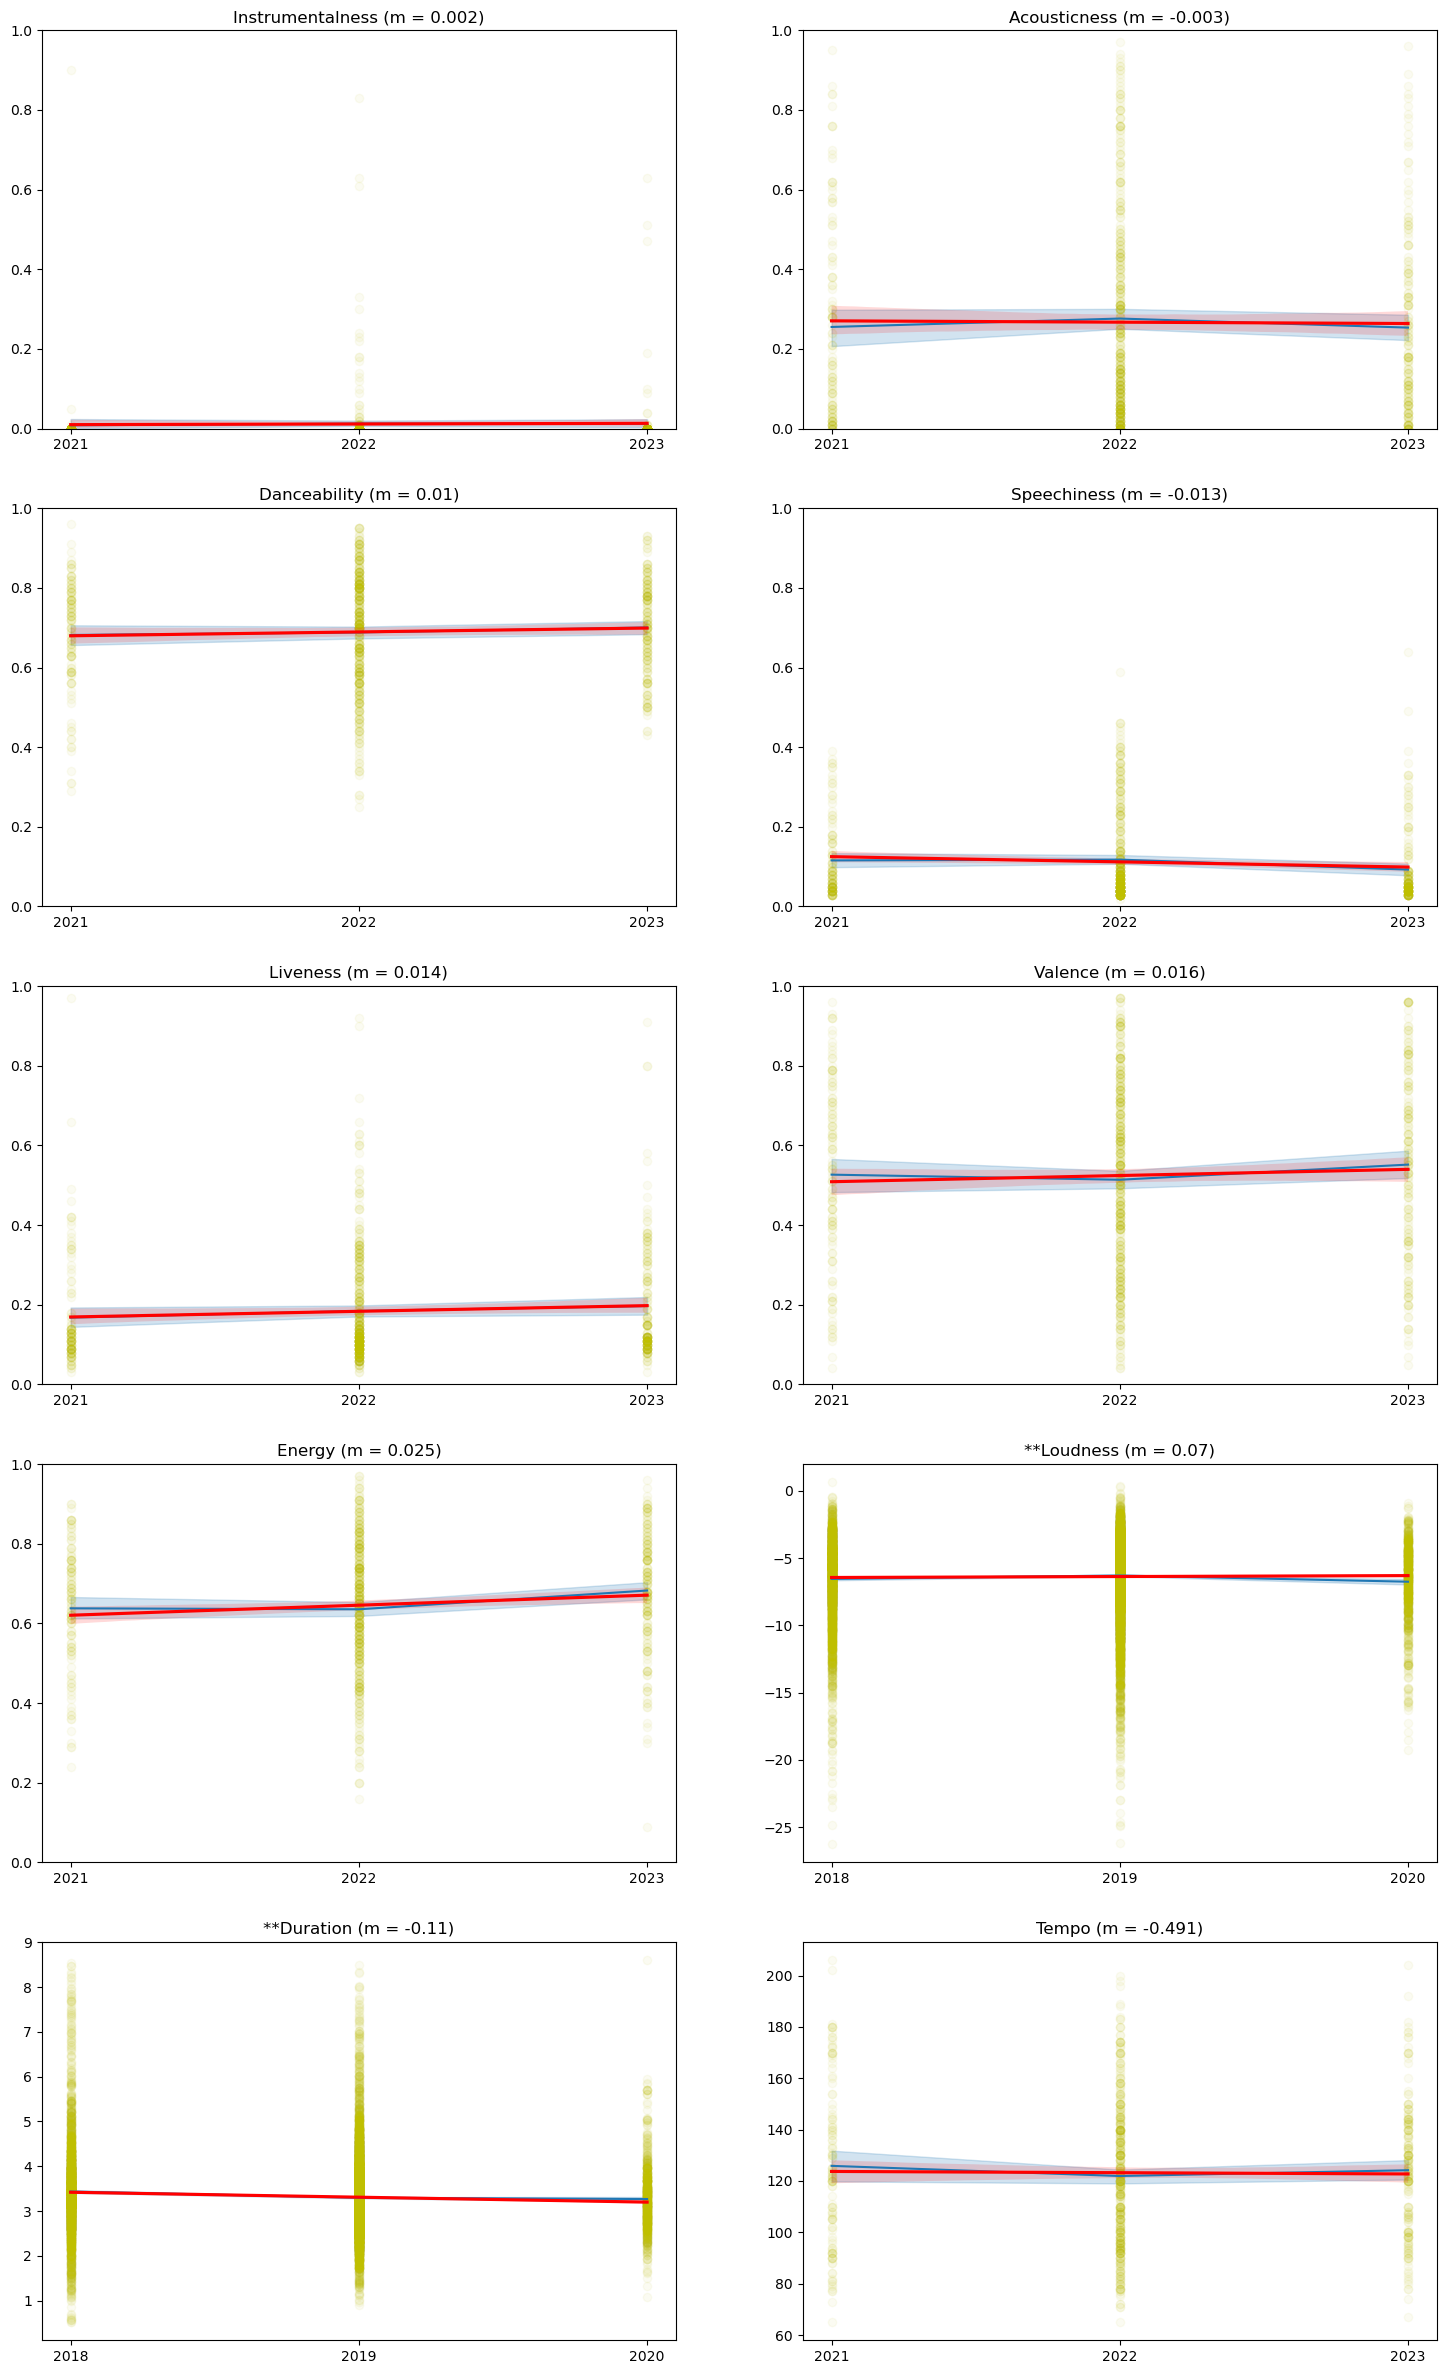

In [62]:
fig, axes = plt.subplots(5, 2, figsize = (18, 30))

sns.lineplot(df2, x='year', y='instrumentalness', ax=axes[0,0]);
sns.regplot(df2, x='year', y='instrumentalness', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[0,0]).set(
    xlabel=None, xticks=range(2021,2024), ylabel=None, ylim=(0,1.0), title=f'Instrumentalness (m = {slope_in3})');

sns.lineplot(df2, x='year', y='acousticness', ax=axes[0,1]);
sns.regplot(df2, x='year', y='acousticness', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[0,1]).set(
    xlabel=None, xticks=range(2021,2024), ylabel=None, ylim=(0,1.0), title=f'Acousticness (m = {slope_ac3})');

sns.lineplot(df2, x='year', y='danceability', ax=axes[1,0]);
sns.regplot(df2, x='year', y='danceability', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[1,0]).set(
    xlabel=None, xticks=range(2021,2024), ylabel=None, ylim=(0,1.0), title=f'Danceability (m = {slope_da3})');

sns.lineplot(df2, x='year', y='speechiness', ax=axes[1,1]);
sns.regplot(df2, x='year', y='speechiness', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[1,1]).set(
    xlabel=None, xticks=range(2021,2024), ylabel=None, ylim=(0,1.0), title=f'Speechiness (m = {slope_sp3})');

sns.lineplot(df2, x='year', y='liveness', ax=axes[2,0]);
sns.regplot(df2, x='year', y='liveness', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[2,0]).set(
    xlabel=None, xticks=range(2021,2024), ylabel=None, ylim=(0,1.0), title=f'Liveness (m = {slope_li3})');

sns.lineplot(df2, x='year', y='valence', ax=axes[2,1]);
sns.regplot(df2, x='year', y='valence', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[2,1]).set(
    xlabel=None, xticks=range(2021,2024), ylabel=None, ylim=(0,1.0), title=f'Valence (m = {slope_va3})');

sns.lineplot(df2, x='year', y='energy', ax=axes[3,0]);
sns.regplot(df2, x='year', y='energy', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[3,0]).set(
    xlabel=None, xticks=range(2021,2024), ylabel=None, ylim=(0,1.0), title=f'Energy (m = {slope_en3})');

sns.lineplot(dftsff, x='year', y='loudness', ax=axes[3,1]);
sns.regplot(dftsff, x='year', y='loudness', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[3,1]).set(
    xlabel=None, xticks=range(2018,2021), ylabel=None, title=f'**Loudness (m = {slope_lo3})');

sns.lineplot(dftsff, x='year', y='duration', ax=axes[4,0]);
sns.regplot(dftsff, x='year', y='duration', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[4,0]).set(
    xlabel=None, xticks=range(2018,2021), ylabel=None, title=f'**Duration (m = {slope_du3})');

sns.lineplot(df2, x='year', y='tempo', ax=axes[4,1]);
sns.regplot(df2, x='year', y='tempo', color='r', scatter_kws={'alpha': 0.05, 'color': 'y'}, ax=axes[4,1]).set(
    xlabel=None, xticks=range(2021,2024), ylabel=None, title=f'Tempo (m = {slope_te3})');

<div class="alert alert-block alert-info">
Key takeaways (2003 - 2020):
<ul>&bull; Tempo decreased</ul>
<ul>&bull; Duration decrease even more drastic</ul>
<ul>&bull; Loudness increase more drastic; closer to change from (1957 - 2020) than change from (2003 - 2020)</ul>
<ul>&bull; Energy increased again</ul>
</div>

## Conclusion

We looked at two datasets to explore music feature changes over time. The first dataset consisted of songs released between 1957 - 2020. We expanded our analysis to present date by evaluating songs from the second dataset that were released between 2021 - 2023. Key takeaways:

- Overall, song duration decreased over the years; shorter songs seem more prominent these days
- Songs became louder
- Generally, tempo increased over the years, but based on the data specifically from 2021 - 2023, it actually decreased

It is important to consider that we have two stories here. One is the change in music features' changes over time, with the primary changes being that songs have become shorter, louder, and faster, all in line with our hypothesis. Though we also saw that though energy generally increased, during the interval between 2003 - 2020, it actually decreased, while acousticness increased. Both of these changes in this interval were contrary to our hypothesis and highlight how musical trends might take unique trajectories during specific intervals. Thus, the second story is the story within the story: that changes are subject to the interval within which they're framed. For example, though tempo increased overall, by examining only the past 3 years, it actually decreased. This highlights an important parameter we must define: what time interval are we looking at. We believe that in order to best reflect popular music *today*, we should assess trends specifically over the past few years, and that future time series analyis should focus on the changes within the past three years, as the final segment of our analysis did.

Finally, we must reiterate that the trends here only reflect our specific sample, and the study's generalizeability is is limited by the size and diversity of our sample. Moreover, because our first and larger sample only consisted of songs released up to 2020, we assess a second, albeit smaller, sample of songs that were released in the past three years. Comparing trends across these two samples might be misinformed by the differences in each sample. For further analysis we should seek a broader variety of observations by aggregating more samples of more diverse observations. Nevertheless, based on what we've gleaned from these samples, we can confirm to Regression Records that we ought to consider prioritizing marketing for the songs that are short, loud, and fast.